In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
processed_data_path = "../processed_data/"

In [2]:
X_train = pd.read_csv(processed_data_path+"X_train.csv")
X_test = pd.read_csv(processed_data_path+"X_test.csv")
y_train = pd.read_csv(processed_data_path+"y_train.csv")
y_test = pd.read_csv(processed_data_path+"y_test.csv")
y_test = y_test.values.squeeze()

In [3]:
#print(X_train.info())

In [4]:
def score(y, pred):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(0, len(y)):
        if int(pred[i]) == 1:
            if int(y[i]) == 1:
                TP = TP + 1
            else:
                FP = FP + 1
        else:
            if int(y[i]) == 1:
                FN = FN + 1
            else:
                TN = TN + 1
    return TP, TN, FP, FN

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [6]:
train_data = X_train
train_data['y'] = y_train

#分离正负样本
pos_train_data = train_data[train_data['y'] == 1]
neg_train_data = train_data[train_data['y'] == 0]
pos_train_data.reset_index(drop = True, inplace = True)
neg_train_data.reset_index(drop = True, inplace = True)
#new_count = n * pos_train_data['y'].count()

In [7]:
#print(pos_train_data.reset_index().head())
#print(pos_train_data.reset_index().describe())

In [8]:
from sklearn.neighbors import NearestNeighbors
import random

def smote_up_sample(data,N):    
    #近邻数k
    k = 3
    #上采样倍率N
    N = 1
    #选择用于评估样本点距离的特征
    feature = ['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']
               
    #feature = data.columns
    #feature = ['age',  'campaign',  'cons.conf.idx',  'cons.price.idx'] 

    #new_data用于存放插值得到的样本
    new_data = np.zeros((data.shape[0]*N,len(feature)))
    newdf = data.copy()
    #print(data.head())
    neighbors = NearestNeighbors(n_neighbors=k).fit(data.loc[:,feature].values)
    for i in range(data.shape[0]):
        #print(data.shape[0]*N)
        point = data.loc[i,feature]
        #print(point.values.reshape(1, -1))
        distances, indices = neighbors.kneighbors(point.values.reshape(1, -1))
        nn = random.randint(1,k-1)
        dis = data.loc[indices[0,nn],feature].values.reshape(1, -1) - data.loc[i,feature].values.reshape(1, -1)
        gap = random.random()
        new_data[i] = data.loc[i,feature].values.reshape(1, -1) + dis * gap
        newdf.loc[i,feature] = new_data[i]             
    data = data.append(newdf)
    return data

In [9]:
#对正样本进行somte过采样
#print(pos_train_data.head())
pos_train_data = smote_up_sample(pos_train_data,N=2)

#pos_train_data = smote_up_sample(pos_train_data)
#简单复制正样本
#pos_train_data = pd.concat([pos_train_data, pos_train_data],sort=False)
#对负样本欠采样
neg_train_data = neg_train_data.sample(frac = 0.7)
#重新拼接正负样本
train_data_sample = pd.concat([pos_train_data, neg_train_data],sort=False)

X_train = train_data_sample.drop(['y'],axis =1)
y_train = train_data_sample['y']


In [10]:
"""
#用PCA做降维处理
from sklearn.decomposition import PCA
pca = PCA(n_components=45)
pca.fit_transform(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_val = pca.transform(X_val)
print(X_train.shape)
"""

'\n#用PCA做降维处理\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=45)\npca.fit_transform(X_train)\nX_train = pca.transform(X_train)\nX_test = pca.transform(X_test)\nX_val = pca.transform(X_val)\nprint(X_train.shape)\n'

In [12]:
"""
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train) 
y_train_pred = dc.predict(X_train)
y_test_pred = dc.predict(X_test)
y_val_pred = dc.predict(X_val)
"""

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, oob_score=True)
rf.fit(X_train, y_train) 
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_val_pred = rf.predict(X_val)



"""
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=400, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)
y_val_pred = gbc.predict(X_val)
"""

"""
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train) 
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
y_val_pred = xgb.predict(X_val)
"""

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


'\nfrom xgboost import XGBClassifier\nxgb = XGBClassifier()\nxgb.fit(X_train, y_train) \ny_train_pred = xgb.predict(X_train)\ny_test_pred = xgb.predict(X_test)\ny_val_pred = xgb.predict(X_val)\n'

Index(['age', 'education', 'default', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object') [0.06553672 0.02745535 0.         0.01320027 0.00898712 0.31979417
 0.04035105 0.02845093 0.01161378

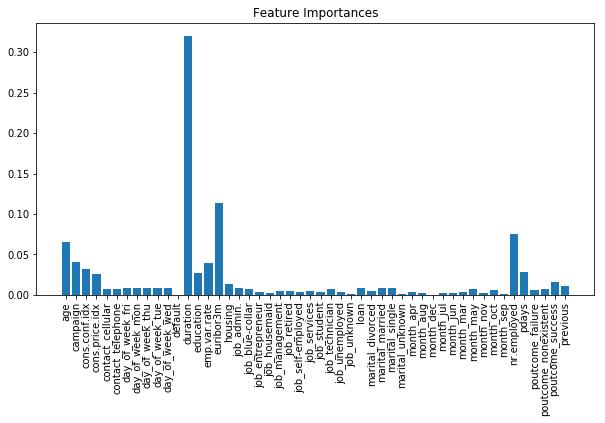

In [20]:
import matplotlib.pyplot as plt
print(X_train.columns,rf.feature_importances_)
f, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation=90)
ax.bar(X_train.columns,rf.feature_importances_)
ax.set_title("Feature Importances")
f.show()

In [ ]:
from sklearn.metrics import classification_report

print("Train set:", classification_report(y_train, y_train_pred))
print("Valiation set:", classification_report(y_val, y_val_pred))
print("Test set:", classification_report(y_test, y_test_pred))

from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)
TP, TN, FP, FN = score(y_test, y_test_pred)
P = TP / (TP + FP)
R = TP / (TP + FN)
F1 = (2 * P * R) / (P + R)

print("Percision：%f"%P)
print("Recall：%f"%R)
print("F1-score：%f"%F1)

In [ ]:
F_I = pd.DataFrame(rf.feature_importances_.reshape((1,-1)), columns = X_train.columns)
print(F_I.columns.tolist())
print(F_I.sort_index(axis = 1,ascending = True))